## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [68]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

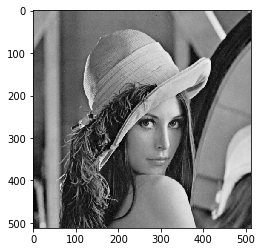

In [69]:
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_im = io.imread(img_path.__add__(img_name))
io.imshow(lena_im)

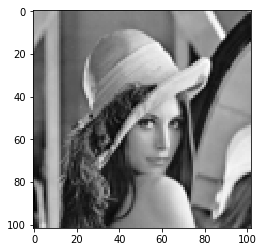

In [70]:
from scipy import misc
lena_2= misc.imresize(lena_im, 20, interp='bilinear', mode= None)
io.imshow(lena_2)

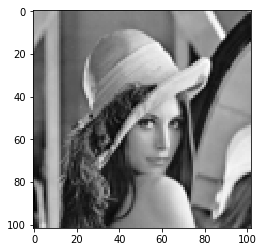

In [71]:
from scipy import misc
lena_3= misc.imresize(lena_im, 20, interp='nearest', mode= None)
io.imshow(lena_2)

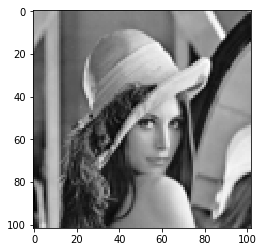

In [72]:
from scipy import misc
lena_4= misc.imresize(lena_im, 25, interp='bicubic')
io.imshow(lena_2)

**Q.2 Similar to the function of `my_blending.m` that you saw before define your function of blending ** 

**Therefore define three functions `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [73]:
#### simple_blend ####
def simple_blend (image_1,image_2):
    m,n=image_1.shape
    blended = np.zeros(image_1.shape)
    blended[:, :int(n/2)] = image_1[:, :int(n/2)] 
    blended[:, int(n/2):] = image_2[:, int(n/2):]
    
    return blended

##### Import image
apple_im = io.imread('images/apple.jpeg', as_grey = True)
orange_im = io.imread('images/orange.jpeg', as_grey = True)

Text(0.5,1,u'Simple blended image')

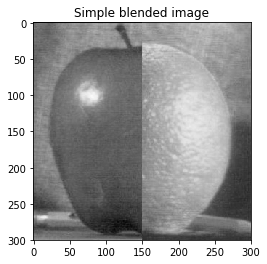

In [74]:
## Use simple_blend function
blended_simple_im = simple_blend (apple_im, orange_im)
## Show image
io.imshow(blended_simple_im)
plt.title ('Simple blended image')

In [75]:
#### pyramid_blend ####

def pyramid_blend (img_1, img_2):
    
    # create a Laplacian pyramid for image_1
    L1 = tuple(transform.pyramid_laplacian(img_1, max_layer=6))
    # create a Laplacian pyramid for image_2
    L2 = tuple(transform.pyramid_laplacian(img_2, max_layer=6))
    # Blend the laplacian pyramids 
    laplacianPyramidComb = []
    for l1, l2 in zip(L1, L2):
        rows, cols = l1.shape
        laplacianComb = np.hstack((l1[:, :int(cols / 2)], l2[:, int(cols / 2):]))
        laplacianPyramidComb.append(laplacianComb)
    # Collapse the laplacian pyramid
    ls = laplacianPyramidComb[6]  
    for i in range(5,-1,-1):
        ls = transform.pyramid_expand(ls)
        if ls.shape > laplacianPyramidComb[i].shape:
            ls = np.delete(ls, (-1), axis=0)
            ls = np.delete(ls, (-1), axis=1)
        ls = ls + laplacianPyramidComb[i]
    return ls

Text(0.5,1,u'Pyramid blended image')

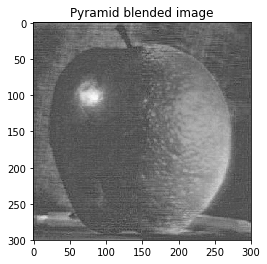

In [76]:
## Use pyramid_blend function
blended_pyramid_im = pyramid_blend (apple_im, orange_im)
## show image
io.imshow(blended_pyramid_im, cmap='gray')
plt.title ('Pyramid blended image')

In [77]:
#### alpha_blend ####

def alpha_blend(img1,img2,window):
    rows,col = img1.shape
    
    img_blend = np.zeros(img1.shape)
    img_blend[:, :int(col/2) - window] = img1[:, :int(col/2) - window]
    img_blend[:, int(col/2) + window:] = img2[:, int(col/2) + window:]
    
    x1 = np.ceil(col/2)-window
    x2 = np.ceil(col/2)+window
    x = np.arange(int(x1),int(x2))
    alpha = x/(x1-x2)-x2/(x1-x2)
    img_blend[:, x] = alpha*img1[:, x] + (1-alpha)*img2[:, x]
    
    return img_blend

Text(0.5,1,u'Alpha blended images')

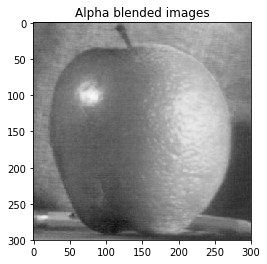

In [78]:
## Use alpha_blend function
blended_alpha_im = alpha_blend(apple_im , orange_im , 45)
plt.show()
## show image
io.imshow(blended_alpha_im)
plt.title('Alpha blended images')